In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting styles
sns.set(style="whitegrid")
%matplotlib inline

df = pd.read_csv("/content/drive/MyDrive/Data Science and ML course/Titanic_Dataset/train.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 4. Basic info
print("Shape of dataset:", df.shape)
print("\nData types and non-null counts:")
df.info()

Shape of dataset: (891, 12)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)


,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


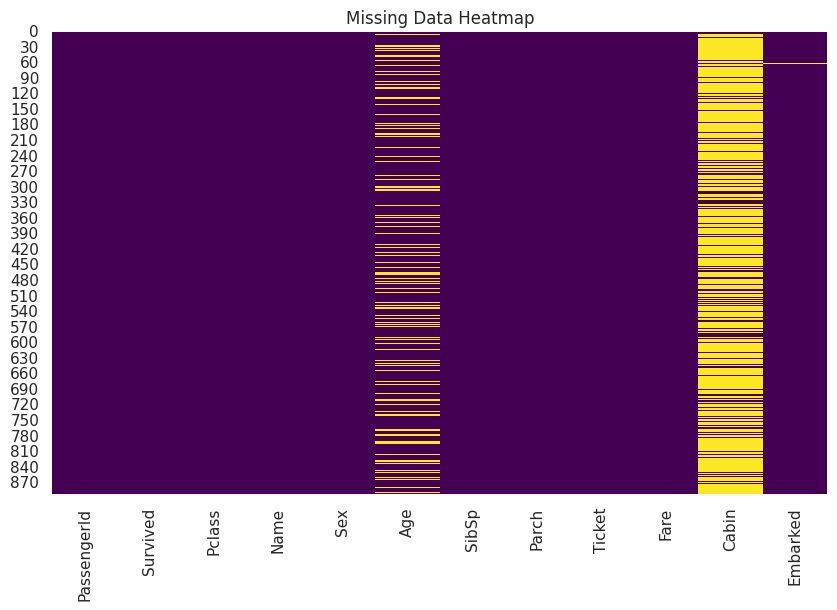

In [6]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


<ipython-input-7-2002888514>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='Set2')


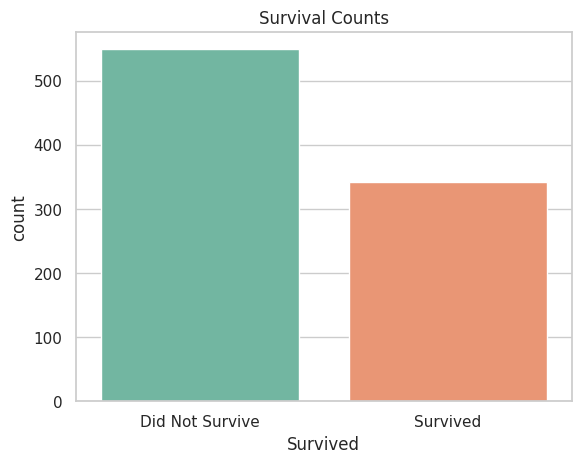

In [7]:
# Target Variable Distribution (Survived)
sns.countplot(data=df, x='Survived', palette='Set2')
plt.title('Survival Counts')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

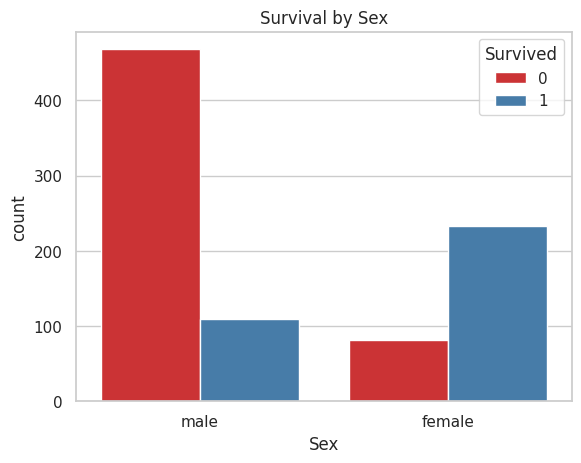

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
# Survival Rate by Sex
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival by Sex')
plt.show()

df.groupby('Sex')['Survived'].mean()


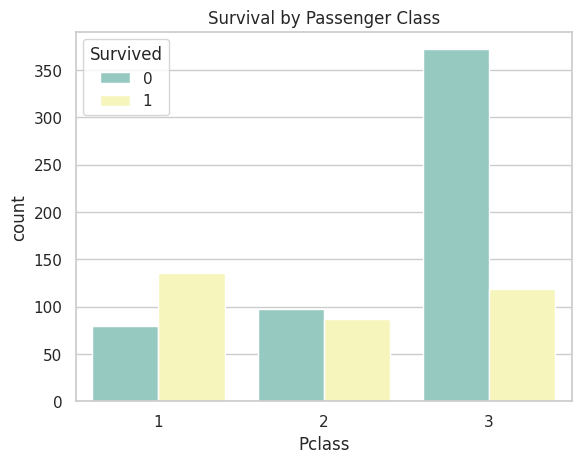

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [9]:
# Survival Rate by Pclass (Passenger Class)
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set3')
plt.title('Survival by Passenger Class')
plt.show()

df.groupby('Pclass')['Survived'].mean()


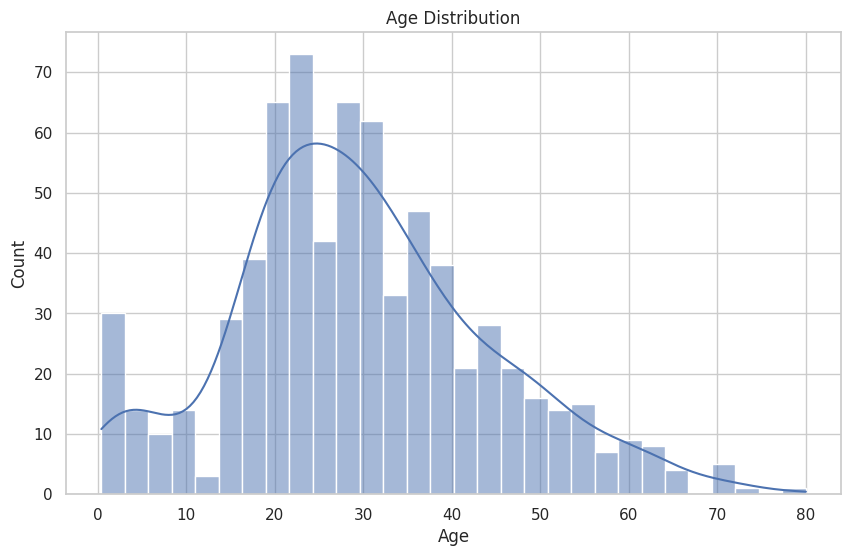

In [10]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.show()


<ipython-input-11-2132679874>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Survived'] == 1, 'Age'], label='Survived', shade=True)
<ipython-input-11-2132679874>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Survived'] == 0, 'Age'], label='Did Not Survive', shade=True)


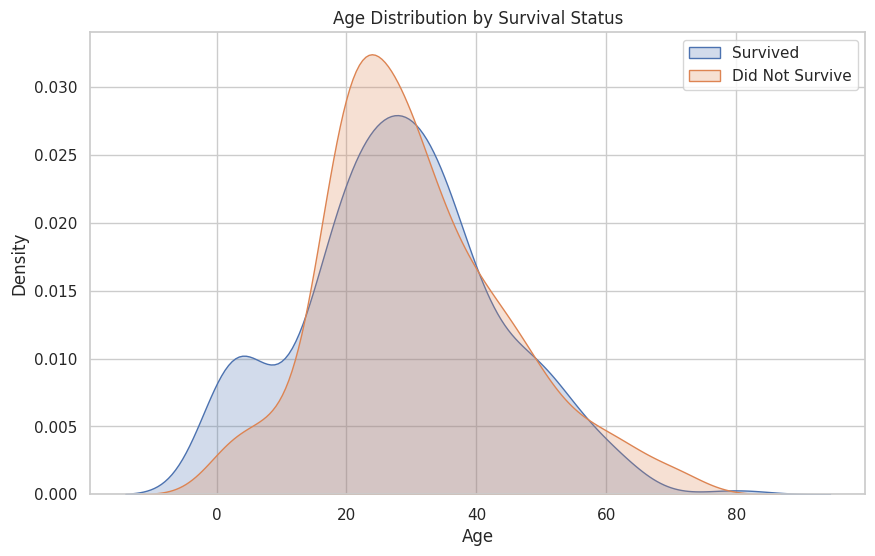

In [11]:
# Age vs Survival
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Survived'] == 1, 'Age'], label='Survived', shade=True)
sns.kdeplot(df.loc[df['Survived'] == 0, 'Age'], label='Did Not Survive', shade=True)
plt.title('Age Distribution by Survival Status')
plt.legend()
plt.show()


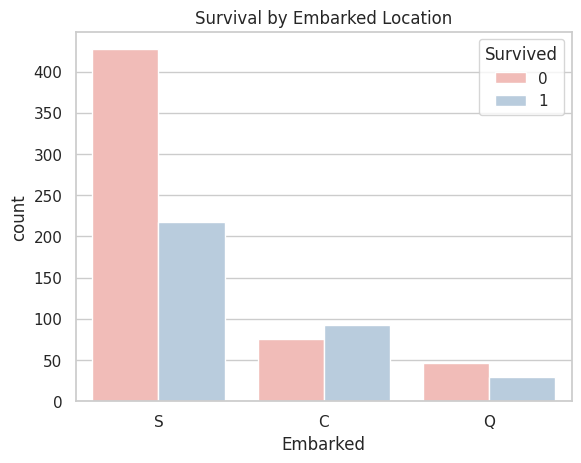

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [12]:
# Embarked vs Survival
sns.countplot(data=df, x='Embarked', hue='Survived', palette='Pastel1')
plt.title('Survival by Embarked Location')
plt.show()

df.groupby('Embarked')['Survived'].mean()


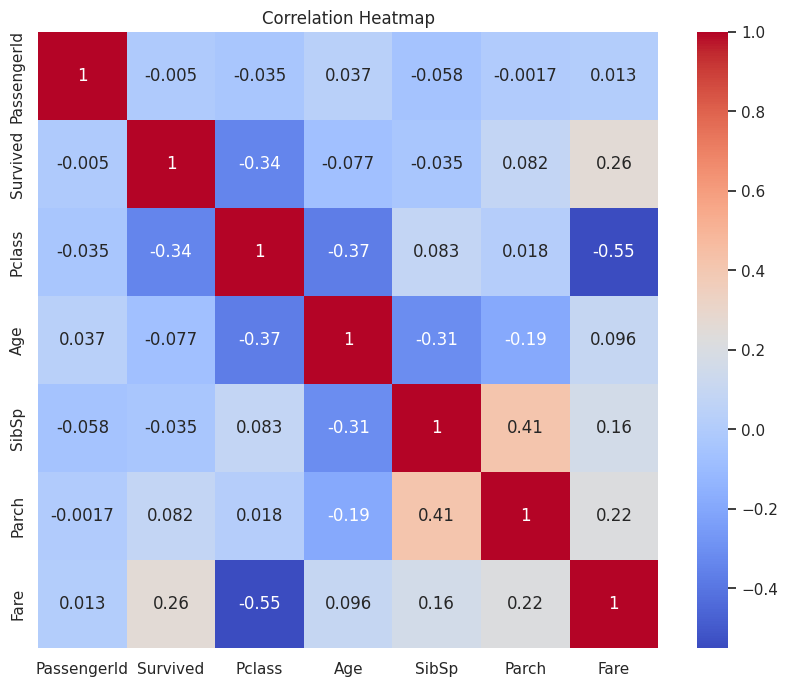

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [14]:
# Quick Observations
print("""
📝 Observations:
- Females had a much higher survival rate.
- First-class passengers were more likely to survive.
- Younger passengers had slightly higher chances.
- Many missing values in 'Age' and 'Cabin' need to be handled in next steps.
""")



📝 Observations:
- Females had a much higher survival rate.
- First-class passengers were more likely to survive.
- Younger passengers had slightly higher chances.
- Many missing values in 'Age' and 'Cabin' need to be handled in next steps.

